In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("train.csv")
data_won = data.dropna(1)


C:\Users\muham\AppData\Local\Temp\ipykernel_7504\4261615963.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_won = data.dropna(1)


In [8]:
#show columns that have only one value
for col in data_won.columns:
    if len(data_won[col].unique()) == 1:
        print(col)


0.9205514385333857


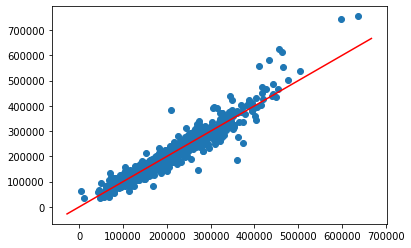

In [9]:
Y = data[data.columns[-1]]
X =pd.get_dummies(data_won.drop(["SalePrice"], axis=1).drop(["Id"], axis=1))
X_design = X.copy()
X_design["intercept"] = 1

cols = X_design.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_design = X_design[cols]

tn_X = X_design.transpose().dot(X_design)
df_inv = pd.DataFrame(np.linalg.pinv(tn_X), tn_X.columns, tn_X.index)
coefficents  = df_inv.dot(X_design.transpose()).dot(Y)
X_design.dot(coefficents)
ee = (Y-X_design.dot(coefficents)).dot((Y-X_design.dot(coefficents)).transpose())
first = (Y - np.mean(Y)).transpose().dot(Y - np.mean(Y))
R_square = 1 - ee/first
plt.scatter(X_design.dot(coefficents), Y)
plot_range = plt.xlim()
plt.plot([plot_range[0], plot_range[1]], [plot_range[0], plot_range[1]],color="red")

In [6]:
df = len(Y)-X.shape[1]-1
res = Y-X_design.dot(coefficents)
res_var =  res.transpose().dot(res)/df
standard_error = np.diagonal(res_var*np.linalg.pinv(tn_X))**(1/2)
t_value = coefficents/standard_error


C:\Users\muham\AppData\Local\Temp\ipykernel_7504\3924149652.py:4: RuntimeWarning: invalid value encountered in sqrt
  standard_error = np.diagonal(res_var*np.linalg.pinv(tn_X))**(1/2)


In [7]:
import scipy as sp
#Calculation of p-values
p_values = pd.DataFrame(2*(1-sp.stats.t.cdf(abs(t_value), df)))
p_values.index = X_design.columns

#Table of estimates
estimates = p_values
estimates["coefficents"] = coefficents
estimates["t_value"] = t_value
estimates["standard_error"] = standard_error
estimates.columns = ["p_value", "coefficents", "t_value", "standard_error"]
estimates = estimates[["coefficents", "t_value", "standard_error","p_value"]]
estimates = estimates.sort_values("p_value",ascending=True)
estimates[estimates["p_value"]<0.05]
indexes = estimates.index.tolist()

#list of significant variable in estimates pricing
print(list(set(map(lambda x: x.split("_")[0] if "_" in x else x, indexes)))) 

['BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'Foundation', 'LowQualFinSF', 'TotRmsAbvGrd', '1stFlrSF', 'PoolArea', 'YearRemodAdd', 'Neighborhood', 'MSSubClass', 'SaleCondition', 'BsmtFullBath', 'PavedDrive', 'BldgType', 'Street', 'FullBath', 'ExterQual', 'TotalBsmtSF', 'YearBuilt', 'OverallQual', 'HalfBath', 'LandSlope', 'HouseStyle', 'Functional', 'MiscVal', 'LotShape', 'GarageCars', 'GarageArea', 'HeatingQC', 'MoSold', 'BsmtFinSF2', 'LotArea', 'MSZoning', '3SsnPorch', 'WoodDeckSF', 'KitchenQual', 'intercept', 'RoofStyle', 'OverallCond', 'YrSold', 'Condition1', 'KitchenAbvGr', 'LotConfig', 'Exterior1st', 'ExterCond', 'GrLivArea', 'BsmtHalfBath', 'Condition2', 'Fireplaces', 'Exterior2nd', '2ndFlrSF', 'Utilities', 'RoofMatl', 'LandContour', 'CentralAir', 'EnclosedPorch', 'BedroomAbvGr', 'Heating', 'SaleType', 'OpenPorchSF']
